Name - Raafe Khan


Andrew ID - rkk

Question 1 - **a** and **c** are TRUE

It is not possible that D(x,y)=D(y,x)

Question 2 - False

*It is possible to overfit a decision tree if it is fully grown, because a fully grown decision tree loses its generalization capabilities and noise tends to creep in*. Overfitting due to noise typically takes place when mislabeled instances may contradict the class labels of other similar records or instances. Overfitting can also be a result of training error also known as 'resubstitution error'.

Question 3 - c) Decision Tree

A decision tree would be apt in this case because if we are to implement a data driven approach to classify consumption, a *decision tree* (classifier) will be able to classify that by using unmanipulated or physical variables as input features and then be able to split the dataset into two distinct classes i.e. Green or Wasteful buildings

Question 4 - False

In class we **minimized** the total weighted variance of the data falling under each leaf split. More variance would typically correspond to an inaccurate prediction model, which is what we don't want in the larger scheme of things.

Question 5 - a) **n**

Each split of the tree must have atleast one training example, hence if there are n training examples, the length of the tree must be **n**. If we have more than  **n** parameters, we may end up oversplitting, which is undesirable.

I was able to validate this by drawing a decision tree, with the same threshold, and using the BuildSys paper written by the authors of D-R Advisor as a point of reference. 

$$Code$$

Question 2 Part 1

In [13]:
#Importing key libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import itertools
import pickle

%matplotlib inline

In [14]:
pickle_file = open('/Users/Raafe/Desktop/campusDemand.pkl','rb')
pickled_data = pickle.load(pickle_file)
pickle_file.close()

# Since we pickled them all together as a list, I'm going to assign each element of the list to the same variable
# we had been using before:
data = pickled_data[0]
pointNames = pickled_data[1]
data_by_day = pickled_data[2]
idx = pickled_data[3]

In [15]:
data = data[data['Point name'] == pointNames[5]]
data = data.drop(data.columns[0],axis=1)
data['Hour'] = data['Time'].dt.hour
data['Weekday'] = data['Time'].dt.dayofweek

In [16]:
data['DayOfYear'] = data['Time'].dt.dayofyear
loadCurves = data.groupby(['DayOfYear','Hour'])['Value'].mean().unstack()

# f = open('../../lectures/data/loadCurves.pkl','wb')
# pickle.dump([data,loadCurves],f)

In [17]:
#Removing NaN values from the loadcurves
loadCurves1=loadCurves.replace(np.inf,np.nan).fillna(0)

In [80]:
#Manipulating the rows and columns to match the indexes
data1=data.set_index('Time',drop=True)
data2=data1.resample('D').mean()
data3=data2.drop(data2.columns[1],axis=1)
data3.index=np.arange(1,367)
data4=data3.drop(data3.columns[2],axis=1)

In [83]:
#Splitting the data by day of the week to produce a column with binary output (0/1) based on the conditions set
Value=[]

for row in data4['Weekday']:
    if row>=0 and row <5:
        Value.append(1)
    else:
        Value.append(0)
        
data4['Value']=Value

In [34]:
data5=data4.drop(366)

In [30]:
#Importing scikit learn
from sklearn import tree

In [84]:
#Fitting the Decision Tree
clf=tree.DecisionTreeClassifier()
clf=clf.fit(loadCurves1,data5['Value'])
clf.score(loadCurves1,data5['Value'])

1.0

In [69]:
print(clf.feature_importances_)

[ 0.01169872  0.01018664  0.01892953  0.02839573  0.05670644  0.01741134
  0.01456839  0.02419047  0.03785379  0.07756112  0.02042633  0.09380974
  0.07587967  0.02989967  0.06813987  0.06555699  0.04109609  0.01765521
  0.04412166  0.01935034  0.01782662  0.03085376  0.07243441  0.10544749]


The decision tree has been sucessfully trained using the scikit learn library

Question 2 Part 2

In [85]:
#Predicting Part a
clf.predict([[7000,8000,9000,10000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000]])

array([0])

In [86]:
#Predicting Part b
clf.predict([[7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000]])

array([1])

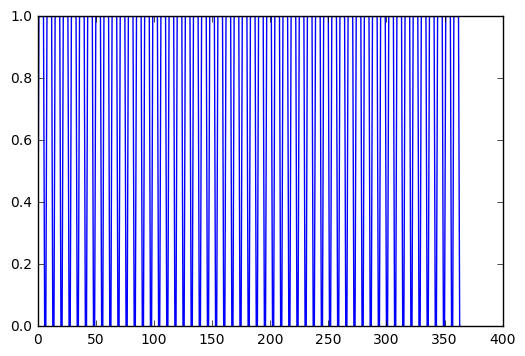

In [70]:
plt.plot(clf.predict(loadCurves1))

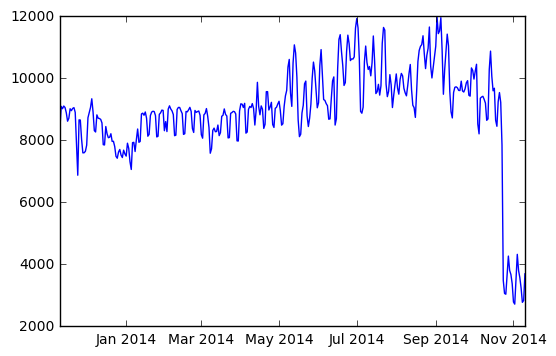

In [82]:
plt.plot(data2['Value'])

In [87]:
#Importing the confusion matrix code from sklearn
from sklearn.metrics import confusion_matrix
y_true=data5['Value']
y_pred=clf.predict(loadCurves1)
C_=confusion_matrix(y_true, y_pred)
C_

array([[105,   0],
       [  0, 260]])

We have 105 True Positives which correspond to Weekends, whereas we have 260 True Negatives, which correspond to Weekdays. In our model, **Positive Predictive Values = 1 (TP/(TP+FP))** and, **Negative Predictive Values = 1 (TN/(TN + FN))** and **Accuracy = (TP + TN)/(P + N) = 1**.

Conclusively, the model makes sense and in some way validates how and why we got a perfect score during classification.


*Source: Wikipedia

Question 2 Part 3

In [88]:
#For Cross Validation
# from sklearn import datasets, linear_model
# from sklearn.model_selection import cross_val_score
# lasso = linear_model.Lasso()
# print(cross_val_score(lasso, loadCurves1, data5['Value']))

In [ ]:
from sklearn.cross_validation import train_test_split
xa = np.array(loadCurves1)
ya = np.array(data5['Value'])
xb = xa
yb = ya
X_train, X_test, Y_train, Y_test = train_test_split(xb, yb, test_size=0.1, random_state=0)

reg2 = tree.DecisionTreeClassifier(max_depth=10)
reg2.fit(X_train,Y_train)

reg2.score(X_test,Y_test)

In [78]:
#Cross Validation
scores=cross_val_score(reg2,loadCurves1, data5['Value'] ,cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.66 (+/- 0.14)


The model seems like it has been overfit since the 10-fold Cross Validation score is 0.66 with a standard deviation of +/- 0.14, whereas the original score was a perfect 1. This kind of makes sense becasue when the model is trying to fit the entire dataset it overfits because scikit learn wants to pass all or most of the points through it, however when we disaggregate the dataset using a 10-fold cross validation approach, we find that the accuracy is reduced since the anamolies are probably ignored during the fitting process.

Question 2 Part 4

(348, 24)
219
129


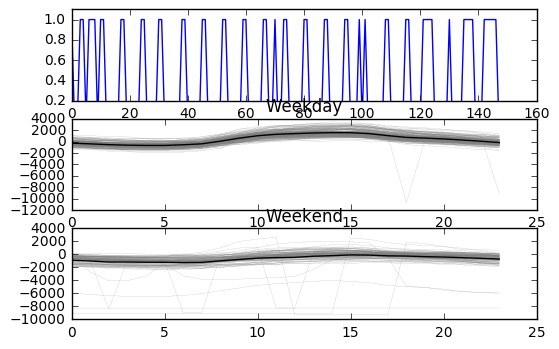

In [89]:
#Performing K-Means clustering
from sklearn.cluster import KMeans
# loadCurves1 = loadCurves1.replace(np.inf,np.nan).fillna(0)
A = loadCurves1.as_matrix().astype(np.float32)
A = np.concatenate([A[:297,:],A[314:,:]])
print(A.shape)  

lp = 10
seasonal = []
for i in range(int(len(A))):
    seasonal.append(np.mean(A[np.max([i-lp,0]):i+lp,:]))
plt.plot(seasonal, label='seasonal effect')
plt.plot(np.mean(A,axis=1), label='daily average')

A = (A.T - seasonal).T
plt.plot(np.mean(A,axis=1), label='normalized days')
plt.legend()

# Find the clusters
clusters = KMeans(n_clusters=2).fit(A)                        


num_clust = 2

cluster_assignments = clusters.predict(A)
plt.subplot(num_clust+1,1,1)
plt.plot(cluster_assignments[:150])
plt.ylim([0.2,1.1])

for cluster_id in range(len(clusters.cluster_centers_)):
    plt.subplot(num_clust+1,1,cluster_id+2)
    cluster_members = A[cluster_assignments==cluster_id,:]
    print(len(cluster_members))
    for i in range(len(cluster_members)):
        plt.plot(cluster_members[i,:], color='grey', lw='0.1')
    plt.plot(clusters.cluster_centers_[cluster_id,:], color='k', lw='1')
    plt.title('Weekday')
    
plt.title('Weekend')
#     plt.ylim([-2000,2000])

In [97]:
B = data5['Value'].as_matrix().astype(np.float32)
B = np.concatenate([B[:297],B[314:]])
# B = (B.T - seasonal).T

y_true=B
y_pred=clf.predict(A)
C_1=confusion_matrix(y_true, y_pred)
C_1

array([[  0, 101],
       [  0, 247]])

Question 2 Part 5

From the clusters we can see that during Weekdays, there is a slight increase in consumption(cluster centroids) post the 10th hour of the day, whereas during the Weekends, the consumption is relatively flat over the course of the day. Weekday consumption is typically higher than Weekend consumption. Per my analysis, I found that the model is overfit and gives us a perfect score of 1, however when I cross validate the model using a 10 fold cross validation algorithm, I found that the the score is 0.66 with a standard deviation of +/- 0.14. This basically points out that the model had been overfit initially.